# 24. How do I work with dates and times in pandas?

In [1]:
import pandas as pd
ufo = pd.read_csv('data/uforeports.csv', index_col=0)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca , NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro , NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke , CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene , KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair , NY"


In [2]:
# The 'Time' column contains date and time but the dtype of the columns is 'object'.
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
Location           object
dtype: object

In [3]:
# we can treat date and time as string, and get our variables by slicing,
# but this is very week approch.
ufo['Time'].str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [4]:
# The solution is to convert the time column into DateTime format.
ufo['Time'] = pd.to_datetime(ufo['Time'])
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,"Ithaca , NY"
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,"Willingboro , NJ"
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,"Holyoke , CO"
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,"Abilene , KS"
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,"New York Worlds Fair , NY"


In [5]:
# Looking to the data, it looks like if the column does not change, but if look at the dtypes
# it now of type datetime64
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
Location                   object
dtype: object

In [6]:
# We can access different parts of datetime(year, month, weekday, dayofyear, hour, second, ...)
ufo['Time'].dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [7]:
ufo['Time'].dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [8]:
ts = pd.to_datetime('15/12/2000')

In [9]:
# we apply different operation on datetime object.
# in this example we take the rows where date is less than 'ts'
ufo.loc[ufo['Time'] >= ts, :].head()

,City,Colors Reported,Shape Reported,State,Time,Location
18121,Redwood Valley,BLUE,LIGHT,CA,2000-12-15 01:09:00,"Redwood Valley , CA"
18122,San Diego,NaN,LIGHT,CA,2000-12-15 04:05:00,"San Diego , CA"
18123,Waldorf,GREEN,LIGHT,MD,2000-12-15 05:30:00,"Waldorf , MD"
18124,Palo Alto,NaN,DISK,CA,2000-12-15 09:00:00,"Palo Alto , CA"
18125,Savoonga,NaN,DISK,AK,2000-12-15 10:00:00,"Savoonga , AK"


In [10]:
# we can substract two datetime object, that give a Timedelta object.
ufo['Time'].max() - ufo['Time'].min()

Timedelta('25781 days 01:59:00')

In [11]:
# BONUS:
# We will plot the number of ufo per year.
%matplotlib inline
ufo['Year'] = ufo['Time'].dt.year
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,"Ithaca , NY",1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,"Willingboro , NJ",1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,"Holyoke , CO",1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,"Abilene , KS",1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,"New York Worlds Fair , NY",1933


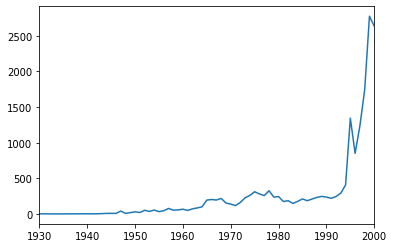

In [12]:
ufo['Year'].value_counts().sort_index().plot()